## Load the data and simple visualisation

In [3]:
from load_oxford_flowers102 import load_oxford_flowers102
import show_methods
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import gzip
import pickle
import nets
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
train_data, validation_data, test_data, class_names = load_oxford_flowers102(imsize=96, fine=False)


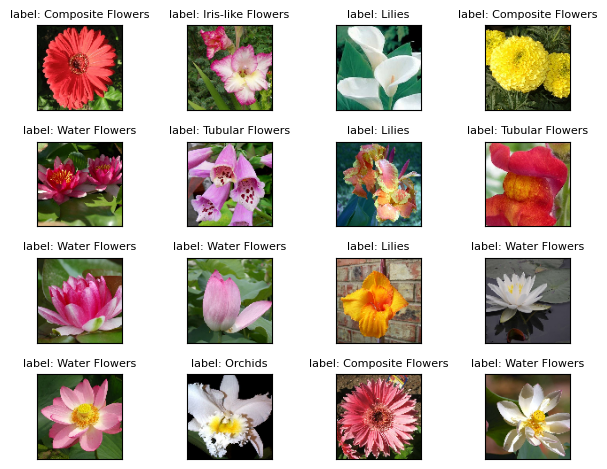

In [103]:
show_methods.show_data_images(train_data['images'][:16], train_data['labels'][:16], class_names=class_names)

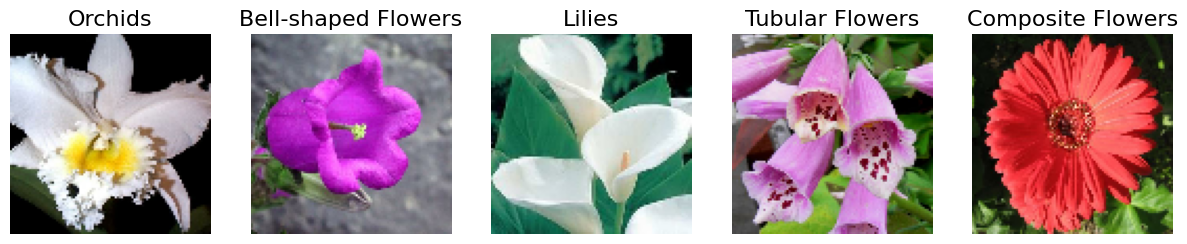

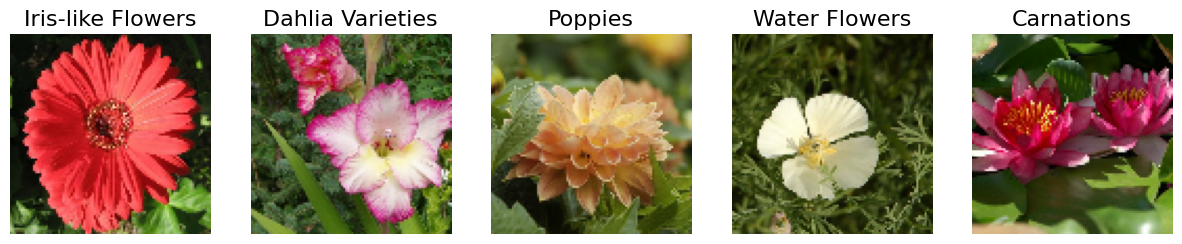

In [104]:
## entirely from chat gpt https://chat.openai.com/share/1af33729-d193-468f-9bf3-538617d3f3c5
def print_examples_from_each_class(data, labels, class_names):
    classes = len(class_names)
    fig, axs = plt.subplots(1, classes, figsize=(15, 3))
    
    for i, l in enumerate(labels):
        # Find the first example of each class
        examples = [image for image, label in zip(data['images'], data['labels']) if label == l]
        if examples:
            axs[i].imshow(examples[0])
            axs[i].set_title(class_names[i], fontsize=16)
            axs[i].axis('off')
    

train_data, validation_data, test_data, class_names = load_oxford_flowers102(imsize=96, fine=False)
print_examples_from_each_class(train_data, range(5), class_names[:5])
print_examples_from_each_class(train_data, range(4, 9), class_names[5:])
plt.show()


## Analyse Class Imbalances

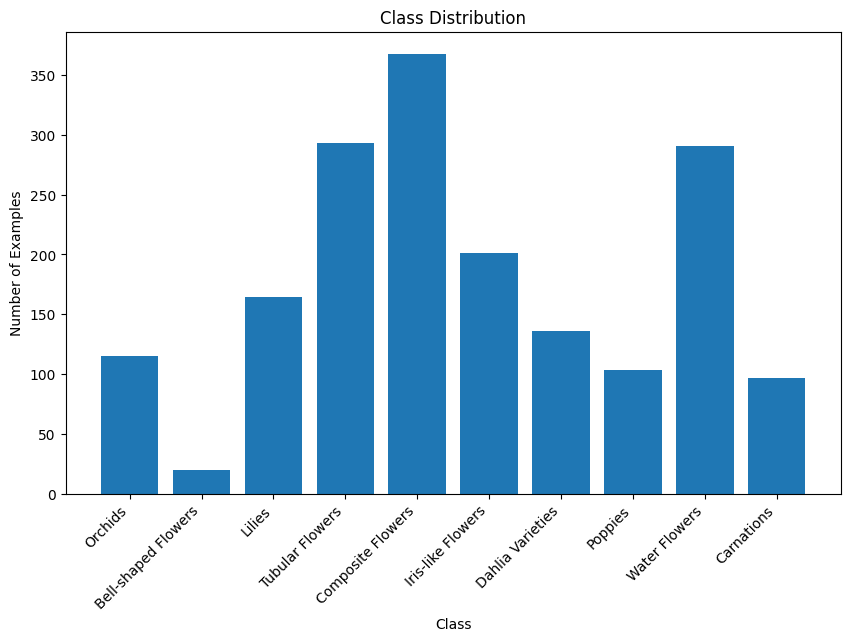

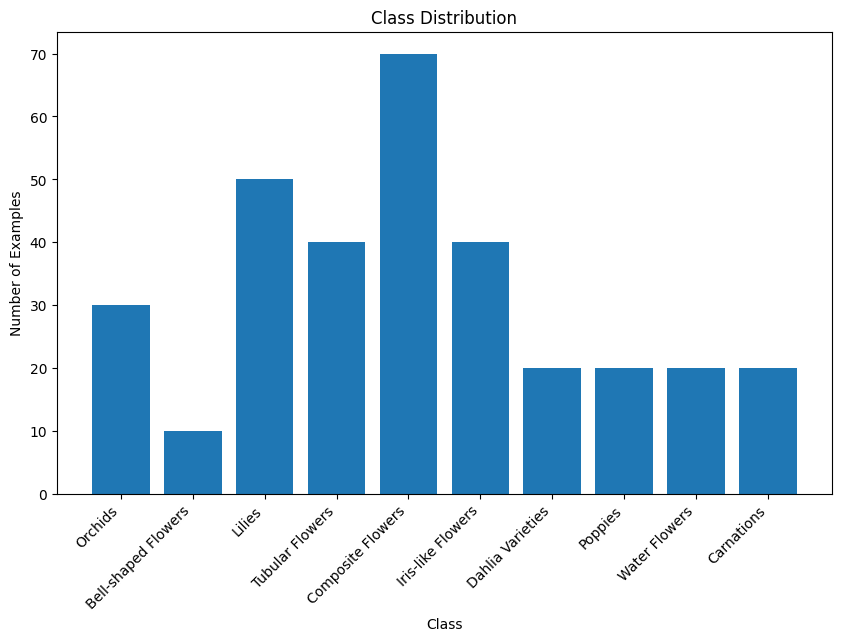

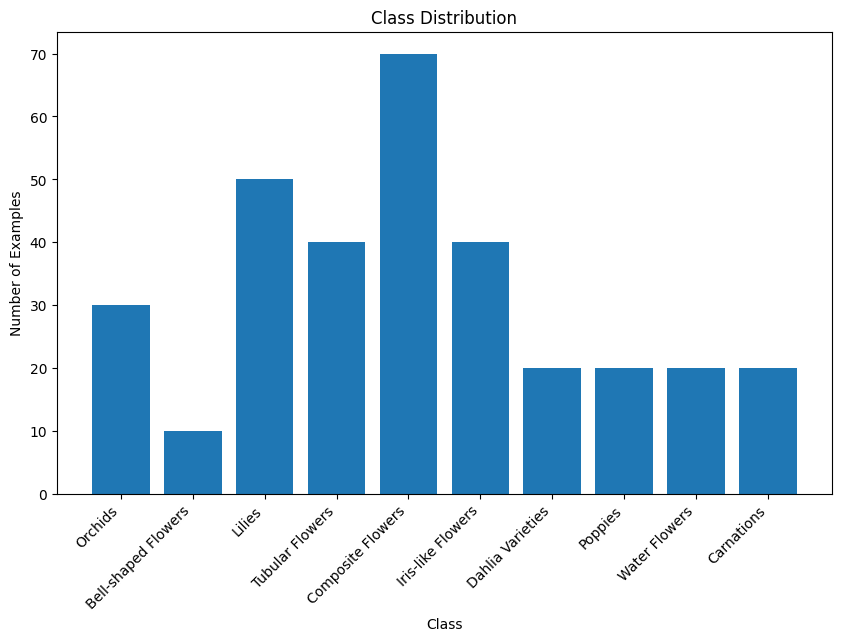

In [105]:
#from chat gpt https://chat.openai.com/share/1af33729-d193-468f-9bf3-538617d3f3c5

def plot_class_distribution(data, class_names):
    class_counts = {class_name: 0 for class_name in class_names}
    for label in data['labels']:
        class_counts[class_names[label]] += 1

    fig, ax = plt.subplots(figsize=(10, 6))
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    x = np.arange(len(classes))
    ax.bar(x, counts, align='center')
    ax.set_xticks(x)
    ax.set_xticklabels(classes, rotation=45, ha='right')
    ax.set_ylabel('Number of Examples')
    ax.set_xlabel('Class')
    ax.set_title('Class Distribution')
    plt.show()

# Example usage:
train_data, validation_data, test_data, class_names = load_oxford_flowers102(imsize=96, fine=False)
plot_class_distribution(train_data, class_names)
plot_class_distribution(validation_data, class_names)
plot_class_distribution(test_data, class_names)


- classes are very imbalanced
- most images of composite flowers, very few images of bell shaped flowers
- validation and test data are similarly imbalanced but train data is imbalanced differently
- validation and test data have identical distribution. might be worth checking if the data is the same or not

## Inspect examples from each class

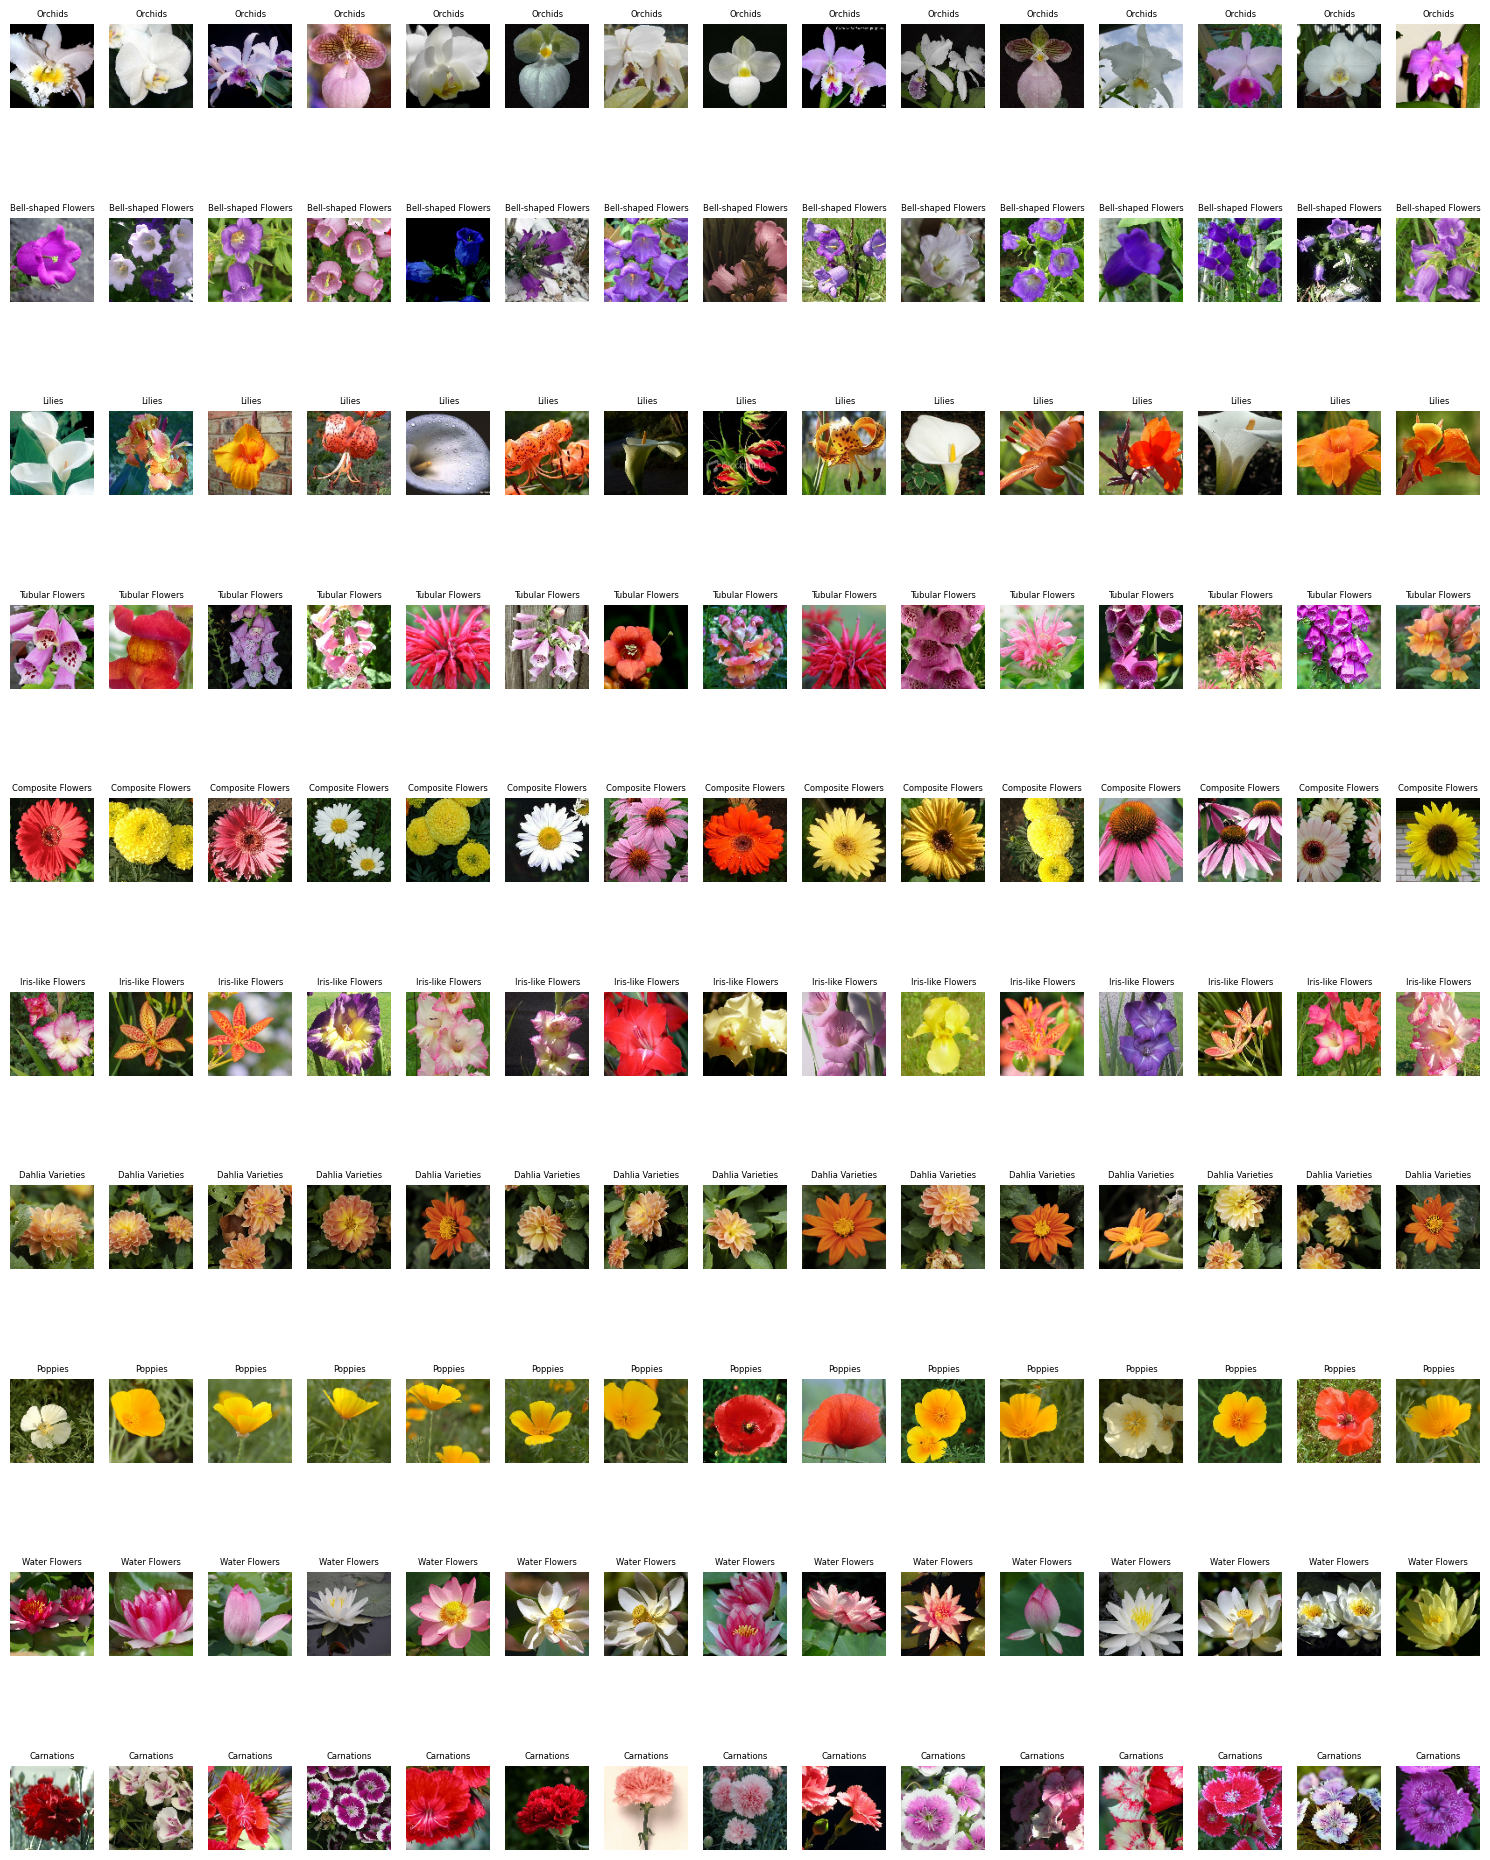

In [106]:
#from chat gpt https://chat.openai.com/share/1af33729-d193-468f-9bf3-538617d3f3c5
def show_examples_of_each_class(data, class_names, num_examples=10):
    classes = len(class_names)
    fig, axs = plt.subplots(classes, num_examples, figsize=(15, 2 * classes))

    for i in range(classes):
        class_examples = [image for image, label in zip(data['images'], data['labels']) if label == i][:num_examples]
        for j, example in enumerate(class_examples):
            axs[i, j].imshow(example)
            axs[i, j].set_title(class_names[i], fontsize=6)
            axs[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
train_data, validation_data, test_data, class_names = load_oxford_flowers102(imsize=96, fine=False)
show_examples_of_each_class(train_data, class_names, 15)


observations:
- many different backgrounds might confuse network. possible worth segmenting
- how much can we downscale images? 96 seems like plenty of resolution. might be possible to downscale
- no obvious duplicate examples
- what kind of data augmentation would be good?
    - horizontal flip ok
    - maybe not rgb shift because colour is important to classify
- no wide scale incorrect labels
- probably possible to classify off local features like petals rather than the whole flower.
    - possibly data aug by cropping?
- is it posible to classify without colour?? would this be interesting??